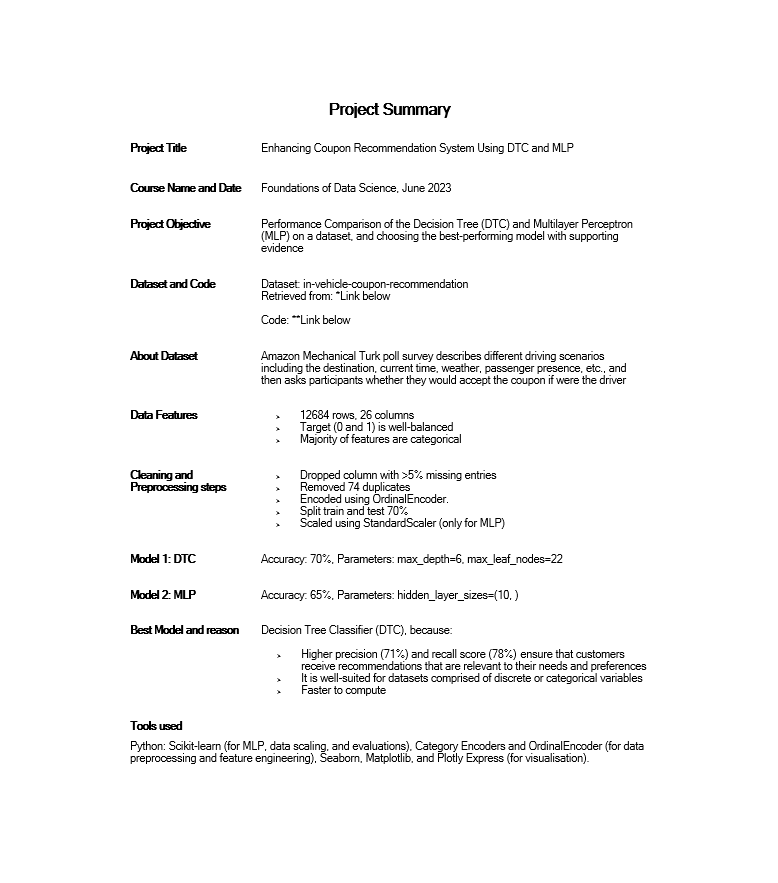

*Dataset and code:

https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv

**Code:
https://github.com/PixieParksie/UniProjects/blob/main/Data%20Science%20Project/%5Bcode%20only%5D%20enhancing%20coupon%20recommendation%20system.ipynb

<br>

<br>

<br>

<br>

<br>

<br>

<br>

# Table of Contents

1. Introduction
2. Data Exploration
3. Data Cleaning
 - Missing Values
 - Duplicates
4. Exploratory Data Analysis (EDA)
      
  - Distribution of coupons
        1. Gender / Occupation & Salary
        2. Marital Status
        3. Contextual: Drivers destination and Time
        4. Situational: Coupons Expiration Dates, Drivers destination, Weather/Season

5. Model 1: Decision Tree Classifier
  - Hyperparameter Tuning
  - Refinement
  - Final optimised classification tree using Graphvis
  - Evaluation: Confusion Matrix
  - Evaluation: Model summary report
Summary
6. Feature importance
  - Feature importance (based on the final classification model)
  - Feature Importance: Chi-Square
  - Comparing the 2 feature selections
7. Model 2: Multi-Layer Perceptrons (MLP)
  - Evaluations
  - Evaluation: MLP Loss and error values
  - MLP Evaluation: Confusion Matrix
8. Performance Comparison: DTC vs MLP
  - Performance metrics: DTC vs MLP
  - Which model is better?


<br>

<br>

<br>

<br>

<br>

<br>

# 1. Introduction

The objective of this report is to utilise machine learning techniques, specifically MLP (Multi-Layer Perceptron) and DTC (Decision Tree Classifier), to enhance a coupon recommendation system. By predicting whether customers will accept or reject a coupon, valuable insights can be gained to customise coupon types more effectively according to customer needs and preferences. These predictions aim to improve customer satisfaction, engagement, and contribute to overall company growth.

# 2. Data Exploration

The 'in-vehicle coupon recommendation Dataset' was gathered from a survey on Amazon Mechanical Turk poll. The survey asked about different driving situations like destination, presence of passengers, weather, and time of day to predict if drivers would accept coupons.

The dataset includes 12,684 entries with 26 attributes.

<br>

<small>C = Categorical</small>

| Feature               | Description                                                                 | Data Type                      |
|-----------------------|-----------------------------------------------------------------------------|--------------------------------|
| destination           | Driver’s destination: "No Urgent Place", "Home", "Work"                     | C                              |
| passenger             | The passenger(s) in the car: "Alone", "Friend(s)", "Kid(s)", "Partner"      | C                              |
| weather               | The weather when the driver is driving: "Sunny", "Rainy", "Snowy"           | C                              |
| temperature           | The temperature when the driver is driving (in °F): "55", "80", "30"        | C (continuous data treated as categorical) |
| time                  | The time at which the driver is driving: "2PM", "10AM", "6PM", "7AM", "10PM" | C/numeric categorical (continuous data treated as categorical) |
| coupon                | Type of coupon that will be accepted: "Restaurant(\$<20)", "Coffee House", "Carryout & Take away", "Bar, Restaurant(\$20-\$50)" | C |
| expiration            | The expiration date of the coupon: "1d", "2h"                               | C/numeric categorical (continuous data treated as categorical) |
| gender                | Driver’s gender: "Female", "Male"                                           | C                              |
| age                   | Driver’s age: "21", "46", "26", "31", "41", "50plus", "36", "below21"       | C/numeric categorical (continuous data treated as categorical) |
| maritalStatus         | Driver’s marital status: "Unmarried partner", "Single", "Married partner", "Divorced", "Widowed" | C |
| has_Children          | Whether the driver has child(ren) or not: 0: no, 1: yes                     | C (binary variable)            |
| education             | Driver’s educational background: "Some college - no degree", "Bachelors degree", "Associates degree", "High School Graduate", "Graduate degree (Masters or Doctorate)", "Some High School" | C |
| occupation            | Driver’s occupation: "Unemployed", "Architecture & Engineering", "Student", "Education&Training&Library", "Healthcare Support", "Healthcare Practitioners & Technical", "Sales & Related", "Management", "Arts Design Entertainment Sports & Media", "Computer & Mathematical", "Life Physical Social Science", "Personal Care & Service", "Community & Social Services", "Office & Administrative Support", "Construction & Extraction", "Legal", "Retired", "Installation Maintenance & Repair", "Transportation & Material Moving", "Business & Financial", "Protective Service", "Food Preparation & Serving Related", "Production Occupations", "Building & Grounds Cleaning & Maintenance", "Farming Fishing & Forestry" | C |
| income                | Driver’s income: "\$37500 - \$49999", "\$62500 - \$74999", "\$12500 - \$24999", "\$75000 - \$87499", "\$50000 - \$62499", "\$25000 - \$37499", "\$100000 or More", "\$87500 - \$99999", "Less than \$12500" | C/numeric categorical (continuous data treated as categorical) |
| Car                   | Car model driven by the driver: "Scooter and motorcycle", "crossover", "Mazda5" | C                              |
| Bar                   | The frequency of restaurant visits per month: "never", "less1", "13", "gt8", "nan48" | C                              |
| CoffeeHouse           | Frequency of cafe visits per month: "never", "less1", "48", "13", "gt8", "nan" | C/numeric categorical (continuous data treated as categorical) |
| CarryAway             | Frequency of takeaway food consumption per month: "n48", "13", "gt8", "less1", "never" | C/numeric categorical (continuous data treated as categorical) |
| RestaurantLessThan20  | Frequency of restaurant visits per month, where the average expense per person is less than \$20: "48", "13", "less1", "gt8", "never" | C/numeric categorical (continuous data treated as categorical) |
| Restaurant20To50      | Frequency of restaurant visits per month, where the average expense per person is between \$20-\$50: "13", "less1", "never", "gt8", "48", "nan" | C/numeric categorical (continuous data treated as categorical) |
| toCoupon_GEQ5min      | Open to travelling beyond a 5-minute distance to use the coupon: 0: no, 1: yes | C (binary variable)            |
| toCoupon_GEQ15min     | Open to travelling beyond a 15-minute distance to use the coupon: 0: no, 1: yes | C (binary variable)            |
| toCoupon_GEQ25min     | Open to travelling beyond a 25-minute distance to use the coupon: 0: no, 1: yes | C (binary variable)            |
| direction_same        | Whether the restaurant or cafe mentioned in the coupon is in the same direction as drivers’ current destination: 0: no, 1: yes | C (binary variable)            |
| direction_opp         | Whether the restaurant or cafe mentioned in the coupon is in the opposite direction as drivers’ current destination: 0: no, 1: yes | C (binary variable)            |
| Y                     | Whether the driver will accept the coupon or not: 0: no, 1: yes              | C (binary variable)            |


# 3. Data Cleaning

#### Missing Values

The feature ‘car’ has the highest missing value rate of 99% (12576). This has been dropped as it can cause bias in the analysis.

The remaining 5 features, “Bar”, “CoffeeHouse”, “CarryAway”, “RestaurantlessThan20”, and “Restaurant 20To50” have an average missing value rate of 1.25%. As per general guidelines, missing values that are less 5% have minimal impact on the overall analysis, therefore we will retain them

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/3dab7bfb-bb35-4c2f-a6d5-615d0c0aa497)

<br>

#### Duplicates

74 duplicates have been removed.

Keep in mind that this dataset lacks a unique identifier or key that distinguishes individual records (such as a customer ID or transaction ID). There is no definitive way to determine if identical rows represent the same entity. It could be different labels assigned to the same record, or simply just a systematic error.


# 4. Exploratory Data Analysis (EDA)

#### Target (y) distribution from summary statistics

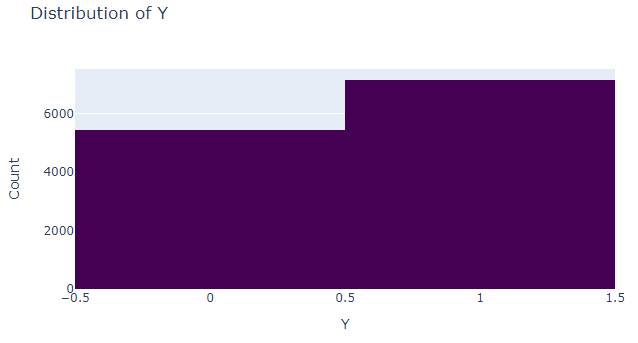

Target seems reasonably balanced.


<br>

#### Distribution of coupons
![image](https://github.com/PixieParksie/UniProjects/assets/106667881/2d088c86-086c-4752-9e35-f7fcf5266ace) ![image](https://github.com/PixieParksie/UniProjects/assets/106667881/4e48c00a-3090-4f1f-8c2c-954264532644)



- Coffee House distributes the most coupons. It shows the highest acceptance rate but also experiences the highest rejection rate.
- Coupons for light meals like restaurants(<20 seats) and takeaways tend to have higher acceptance rates than rejection rates, whereas coupons that have the lowest distribution rate like bars and restaurants (20-50 seats) typically face higher rejection rates.

Let’s investigate the factors that influence coupon type and acceptance rates in the following sequence: gender / occupation & Salary, marital status, situation, and context.

<br>

#### 1. Gender / Occupation & Salary

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/7a3736c9-bd0c-4c15-884b-6daee649022e)

Both males and females have a similar acceptance rate. A larger proportion of females tend to accept the coupon compared to males.

<br>

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/5108f5d2-2ddc-4c8c-a9d6-de3061008c33)

There is a high ratio of drivers who fall under the categories of Unemployed, Student, Education&Training&Library, Sales & Related, and Computer & Mathematical occupations.

<br>

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/c11100c1-9f8e-428c-9286-395871061f33)

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/36c72bcf-fa62-4ebc-a1db-6d7b2ad15848)

Categories that have higher rejection rates are Community/Social Service, Legal, and Retired.

<br>

#### 2. Marital Status

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/425d7fb6-e047-4fc2-8b4a-17e04b14c349)
![image](https://github.com/PixieParksie/UniProjects/assets/106667881/a9a3bde5-245a-45b9-a441-3a92d0574b8e)

Coupons are distributed widely among drivers classified as 'single' and 'married partners' across all categories.

<br>

#### 3.	Contextual: Drivers destination and Time

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/e2057418-7361-4d00-9870-fd09f32b85f2)

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/e2554ff4-fb9d-4fb3-8f54-defb02f2bdf1) ![image](https://github.com/PixieParksie/UniProjects/assets/106667881/dd997e0f-1e28-4bd2-ab65-e664bc4db7a1)

More drivers would accept when they are not in a hurry to reach a destination. Acceptance rates are higher outside of rush hours, with a peak around 2pm, after lunchtime. Less popular times for accepting coupons are around 7am, during morning commute hours, and at 10pm, closer to bedtime.

<br>

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/ef29e9c6-f663-413b-a2a9-a7780a0c7379) ![image](https://github.com/PixieParksie/UniProjects/assets/106667881/867d2013-e069-4be1-aa26-2c3fd0d2c423)

Coupons are more frequently distributed on sunny days compared to cold and rainy days. People are more likely to reject coupons when the weather is rainy or cold.

<br>

#### 4. Situational: Coupons Expiration Dates, Drivers destination, Weather/Season

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/2e0c1efc-d0da-4c96-a14f-7620a3c1beb3)

Acceptance rates are higher when drivers are offered coupons with longer expiration dates.

<br>

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/8056f6e9-fdee-4994-a86b-c08a446f24fb)

Drivers tend to decline the coupon as the distance to drive grows longer.

# 5. Model 1: Decision Tree Classifier

#### Hyperparameter Tuning

As a baseline, I used default parameters, resulting in a decision tree consisting of 4667 nodes and an accuracy score of 0.69 (2dp).

<br>

10-fold CV scores for adjusted ‘max_depth’ parameter

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/c06ffe2c-2363-4104-bd1e-1b31f5f5b394)
- Adjusted the max_depth parameter to limit the depth of the decision tree, testing different values of max_depth from 1 to 14 using 10-fold cross-validation for each value.
- Diagram below displays the average scores from 10-fold cv for various max_depth values. The optimal max_depth is 6.
- After adjusting the max_depth parameter, nodes in the tree decreased to 127, and the accuracy score improved to 0.70 (2dp)

<br>

#### Refinement

10-fold CV scores for adjusted ‘max_leaf_nodes’ parameter

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/d5471d10-d2f9-4dc2-a947-31868744e831)
- I focused on adjusting the max_leaf_nodes parameter, as it limits the max number of leaf nodes in the decision tree.
- Used max_depth value of 6 as a starting point, then examined different max_leaf_node values from 2 to 39. Through this process, we determined that a max_leaf_node value of 22 resulted in the highest score from our 10-fold cross-validation.
- The model achieved an accuracy score of 0.70 (2dp). Adjustments did not significantly improve the accuracy of DTC.

<br>


#### Final optimised classification tree using Graphvis

![DTC](https://github.com/PixieParksie/UniProjects/assets/106667881/246ae68f-359a-4c61-9507-d13b35b0d0aa)
- This binary tree comprises a total of 47 nodes - 24 internal nodes with 22 leaf nodes that make final classification decisions.
- The optimised tree has a depth of 6 levels. This depth value was identified as optimal during the decision tree's parameter optimisation (depth indicates the longest path from the initial node to any leaf node in the tree).

<br>

#### DTC Evaluation: Confusion Matrix

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/c5ffb783-741b-416f-b6ea-4812754e76ea)
- 1661 instances were correctly classified as 'accept' (TP).
- 970 instances were correctly classified as 'reject' (TN).
- 684 instances were incorrectly classified as 'accept' when they were actually 'reject' (FP).
- 468 instances were incorrectly classified as 'reject' when they were actually 'accept' (FN).

<br>

#### DTC Evaluation: Model summary report

![image](https://github.com/PixieParksie/UniProjects/assets/106667881/e2e8c101-4de8-456a-b7b5-43f9ee0aa5cd)

- Precision 0: Model predicts a customer will respond negatively to a coupon, it is correct 67% of the time. It is fairly good at identifying customers who will not respond positively to a coupon, but it still makes some mistakes. 33% of the time, when it predicts a negative response, the prediction is incorrect (FP).

- Precision 1: Model is slightly better at identifying customers who will respond positively to a coupon. However, it still has a 29% rate of incorrect predictions for positive responses (FP). It predicts a customer will respond positively to a coupon, it is correct 71% of the time.

- Recall 0: Model correctly identifies 59% of the actual negative responses. In other words, out of all the customers who truly would not respond positively to a coupon, the model correctly predicts 59% of them.

- Recall 1: Model correctly identifies 78% of the actual positive responses. In other words, out of all the customers who truly would respond positively to a coupon, the model correctly predicts 78% of them.

- F1-score 0: Out of all instances predicted as 'reject' by the model, 63% are actually 'accept'.
63% indicates some balance between the precision (67%) and recall (59%) for predicting negative responses (reflects the model's overall ability to correctly classify customers who will not respond positively to a coupon).

- F1-score 1: The F1-score of 74% reflects a balance between the model's precision and recall for predicting positive responses.
74 means the model has a good overall performance in correctly identifying customers who will respond positively to a coupon (A high score is desirable as it indicates that the model makes fewer mistakes in predicting positive responses).

- Accuracy: 70% of the predictions made by the model are correct (predictions across both 'accept' and 'reject' classes).

<br>

#### Summary

The model performs adequately in predicting coupon acceptance and rejection. Error rate of 30% indicates there are still opportunities for enhancement, especially in reducing false predictions. Further optimisation could focus on improving precision for 'reject' predictions and reducing overall prediction errors.

# 6. Feature importance

#### Feature importance (based on the final classification model)

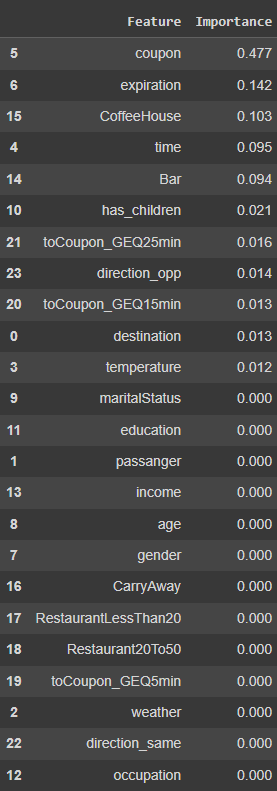

- Each score under ‘Importance’ indicates the significance of input features in predicting the target variable, whether the driver will accept the coupon or not.

- The feature 'coupon' holds a substantially higher importance score of 0.477 plays the most significant role in influencing the model’s decision-making process.

- Following 'coupon', factors such as 'expiration', 'coffee house', 'bar', and 'time' may also play a notable role in influencing the model's decision-making process.

<br>

#### Feature Importance: Chi-Square

To improve the performance of classification models, we eliminate features (attributes) that do not significantly impact the model's decision-making process. This time, we will try using the Chi-Squared Method.

<em><small>Why chi-squared method? Chi-Squared Metho falls under the single-factor analysis of feature selection. It uses ranking algorithms to assess the significance of each feature by analysing these features and the target variable - ideal for analysing categorical data. </small></em>.

<br>

#### Feature selection using Chi-Squared Method

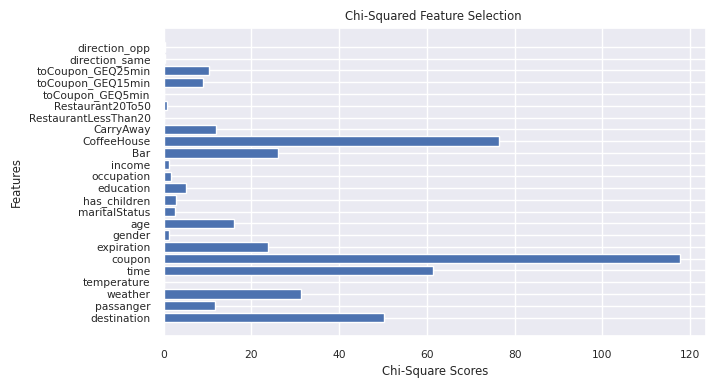


The top 5 significant features: Coupon (117.77), CoffeeHouse (80.34), time (76.41), destination (50.17), and expiration (23.77).


#### Comparing the 2 feature selections

| **Top 5 features from Chi-Square method (desc)** | **Top 5 features from DTC model (desc)** |
|------------------------------------------|----------------------------------|
| Coupon                                   | Coupon                           |
| CoffeeHouse                              | expiration                       |
| time                                     | CoffeeHouse                      |
| destination                              | Bar                              |
| expiration                               | Time                             |

<br>

#### Comparisons:

- 'Coupon' shows strong potential for influencing / predicting the target variables.

- 'CoffeeHouse,' 'time,' and 'expiration' appearing in both the Chi-Square and DTC model results suggest a strong significance. When the same feature shows up in both lists, it indicates a high level of relevance.

- We observe certain features that exist in the Chi-Square method but not in the other method, and vice versa (like 'Bar' and ‘Destination’).


# 7. Model 2: Multi-Layer Perceptrons (MLP)

Testing model: single layer, hidden_layer_size =10, 10-fold-cv, 140 iterations = cv-score 0.64(2dp)

<br>

Initial parameter: hidden_layer_size=10 (single hidden layer with 10 neurons).

<br>

- To find the optimal number of iteration, I tested a range of maximum iterations in increments of 10, ranging from 40 to 250.
- 200 iterations produced the highest average 10-fold cross-validation score of 0.64(2dp).

<br>

Testing the model using a 10-fold CV test

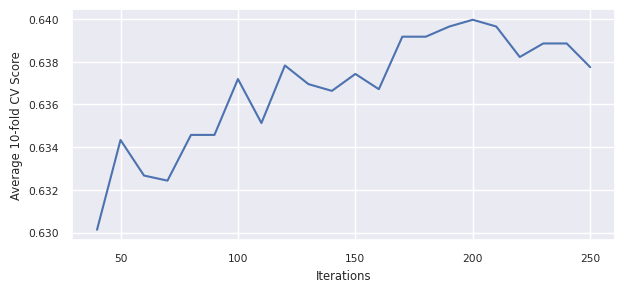

<br>

#### Evaluations

Evaluation: MLP Loss and error values

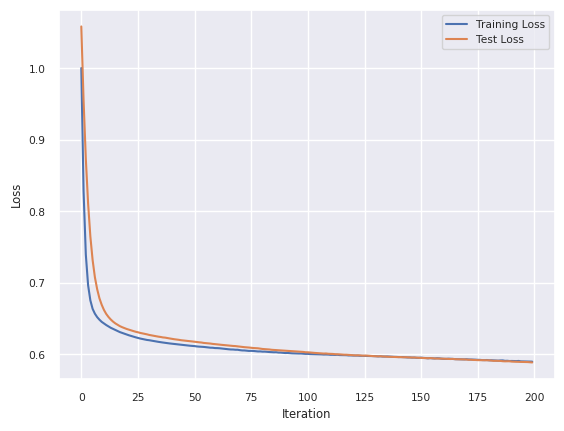

The closely aligned curves show a corresponding decrease, meaning that an appropriate number of iterations has been used for the model.

<br>

MLP Evaluation: Confusion Matrix

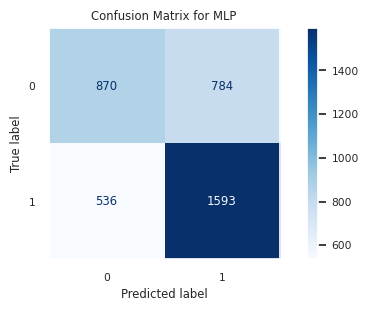

<br>

MLP Evaluation: Model summary report

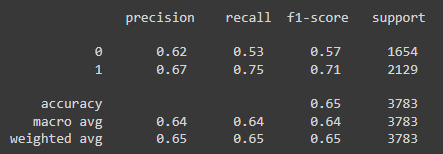

# 8. Performance Comparison: DTC vs MLP

#### Performance metrics: DTC vs MLP
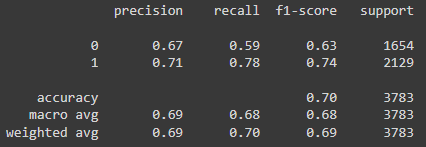 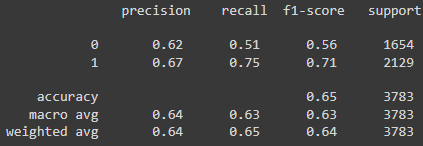

<br>

- Precision: Reliability and correctness of the collected data. It's important metric to make informed and improved business decisions. The decision tree classifier holds a higher score than the MLP classifier, indicating that DTC does a better job in correctly identifying true positives while minimising false positives.


- Recall/Sensitivity: Metric to determine the likelihood of the machine recommending/offering irrelevant coupons to customers. DTC holds a higher recall score of 78%, indicating that the model does a better job of reducing the chances of falsely labelling true positives as negatives compared to the MLP classifier.

<br>

#### Which model is better?

DTC performs better in terms of reducing false positives and negatives. Additionally is it more suitable for this particular dataset (that consist of discrete or categorical variables) and its capability of handling these variables.

DTCs are also well known for their simplicity and interpretability. The decision-making process is transparent (often called “white-box”). Moreover, due to its simplicity, they are faster and don’t require excessive computational resources compared to MLP Classifiers.
